In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols


import scipy
import scipy as sp
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
from scipy.stats import chi2_contingency
from scipy.stats import chi2

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from datetime import datetime
import pickle

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn')

%matplotlib inline

# Setup and Inspection

In [2]:
df = pd.read_csv('life.csv')

In [3]:
df.shape

(2938, 22)

In [4]:
df['Life expectancy '].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

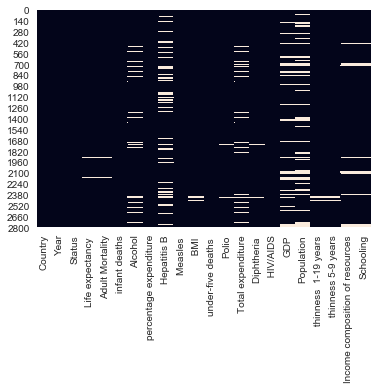

In [6]:
sns.heatmap(df.isna(), cbar=False)

In [7]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
corr = df.corr()

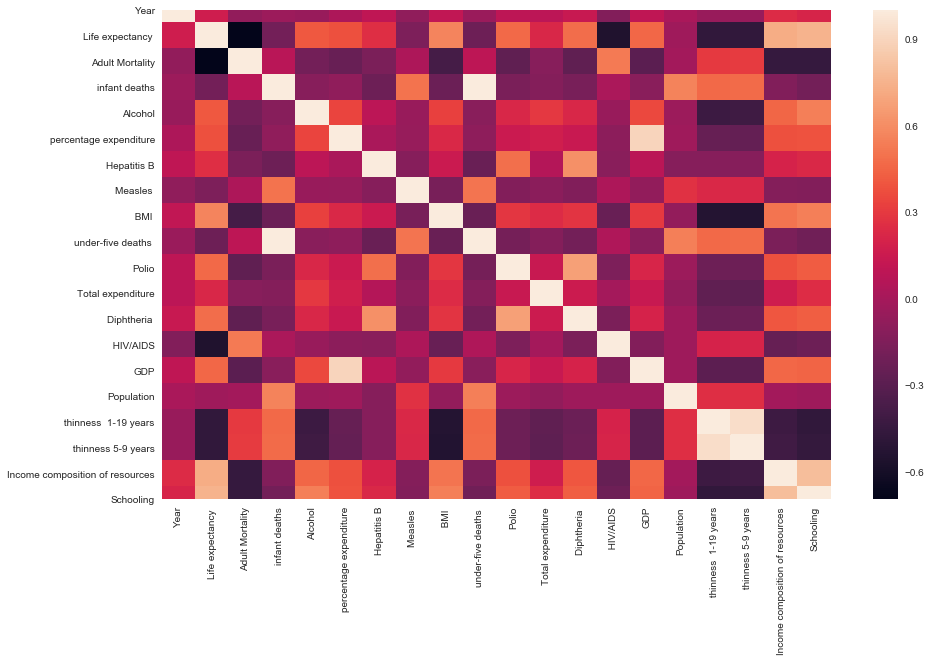

In [9]:
plt.figure(figsize = (15,9))
sns.heatmap(corr)

In [10]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Dropping and Imputing

## Imputing

In [11]:
df2 = df.copy()

In [12]:
df2.GDP = df.GDP.fillna(df.GDP.median())

In [13]:
df2.Schooling = df.Schooling.fillna(df.Schooling.median())

In [14]:
df2['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].median())

In [15]:
df2['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].median())

In [16]:
df2.Alcohol = df.Alcohol.fillna(df.Alcohol.median())

In [17]:
df2['Status'] = np.where(df2['Status'] == 'Developing', 0,1)

In [18]:
# pop_fix = df.groupby('Country')['Population'].max().values

In [19]:
# countr = df.Country.unique()

In [20]:
# pop_dict = dict(zip(countr, pop_fix))

In [21]:
# df2['pop_fix'] = df2.Country.apply(lambda x: pop_dict[x])

In [22]:
# df2.pop_fix = df2.pop_fix.fillna(df2.pop_fix.median())

In [23]:
df2.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [24]:
df2.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Dropping

In [25]:
df2 = df2.drop(columns=['Hepatitis B', 'Country', 'Year',' thinness 5-9 years'])

In [26]:
df2 = df2.dropna(subset =['Life expectancy '])

In [27]:
df2 = df2.dropna()

In [28]:
df2.isna().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
Income composition of resources    0
Schooling                          0
dtype: int64

In [29]:
corr = df2.corr()

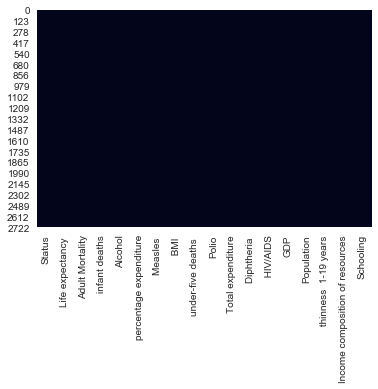

In [30]:
sns.heatmap(df2.isna(), cbar=False)

In [31]:
df2.isna().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
Income composition of resources    0
Schooling                          0
dtype: int64

In [32]:
renamed = []
for i in df2.columns:
    renamed.append(i.lower().strip().replace(' ', '_').replace('-','_').replace('/','_'))

In [33]:
rename_dict = dict(zip(df2.columns, renamed))

In [34]:
rename_dict

{'Status': 'status',
 'Life expectancy ': 'life_expectancy',
 'Adult Mortality': 'adult_mortality',
 'infant deaths': 'infant_deaths',
 'Alcohol': 'alcohol',
 'percentage expenditure': 'percentage_expenditure',
 'Measles ': 'measles',
 ' BMI ': 'bmi',
 'under-five deaths ': 'under_five_deaths',
 'Polio': 'polio',
 'Total expenditure': 'total_expenditure',
 'Diphtheria ': 'diphtheria',
 ' HIV/AIDS': 'hiv_aids',
 'GDP': 'gdp',
 'Population': 'population',
 ' thinness  1-19 years': 'thinness__1_19_years',
 'Income composition of resources': 'income_composition_of_resources',
 'Schooling': 'schooling'}

In [35]:
df2.rename(columns=rename_dict, inplace=True)

In [36]:
shorten = {'life_expectancy':'lifex', \
           'percentage_expenditure':'perc_expend', \
           'total_expenditure':'tot_expend', \
          'population':'pop','income_composition_of_resources':'income_comp'}

In [37]:
df2.rename(columns=shorten, inplace=True)

In [38]:
df2.head()

,status,lifex,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,income_comp,schooling
0,0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,0,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,0,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,0,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,0,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5


# Feature Engineering (None of these improved the model)

In [39]:
# df2['gdp_capita'] = df2['gdp']/df2['pop']*1000000     DID NOT WORK
# df2['gdp_rat_expend'] = df2['gdp']*df2['tot_expend']   BARELY WORKED, NOT WORTH COMPLEXITY

In [40]:
# df2['infant_rate'] = df2.infant_deaths/df2.pop_fix

In [41]:
# df2['under5_rate'] = df2.under_five_deaths/df2.pop_fix

In [42]:
# df2['gdp_rate'] = df2.perc_expend*df2.gdp/100

In [43]:
df2.head()

,status,lifex,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,income_comp,schooling
0,0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,0,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,0,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,0,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,0,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5


In [44]:
df2.shape

(2244, 18)

# Transformation and Scaling

In [45]:
# df2['loglife'] = np.log(df['Life expectancy '])   # DIDN'T WORK, ALEADY NORMALISH

In [46]:
# LOGGING and NORMALIZING DID NOT IMPROVE OUR MODEL

# EDA and Visuals/Correlations

In [47]:
co_sort = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)

In [48]:
lowc = pd.DataFrame(co_sort[-15:-10]).reset_index()
lowc

,Country,Life expectancy
0,Malawi,49.89375
1,Angola,49.01875
2,Lesotho,48.78125
3,Central African Republic,48.51250
4,Sierra Leone,46.11250


In [49]:
co_sort[:5]

Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Name: Life expectancy , dtype: float64

In [50]:
highc = pd.DataFrame(co_sort[:5]).reset_index()
highc

,Country,Life expectancy
0,Japan,82.53750
1,Sweden,82.51875
2,Iceland,82.44375
3,Switzerland,82.33125
4,France,82.21875


In [51]:
cat = pd.concat([lowc,highc])

Text(0, 0.5, 'Life Expectancy')

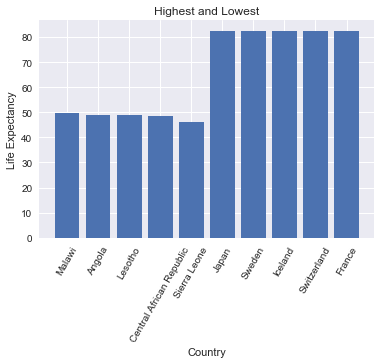

In [52]:

plt.bar(cat.Country, cat['Life expectancy '])
plt.xticks(rotation=60)
plt.title('Highest and Lowest')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')

## Visualizing Log Transformations

In [53]:
def analyse_continous(df, var):
    plt.figure(figsize=(9,6))
    dfv = df.copy()
    sns.distplot(dfv[var])
    plt.ylabel('Count')
    plt.xlabel('Life Expectancy')
    plt.title('Life Expectancy by Country', fontsize=15)
    plt.show()

def analyse_transformed_continous(df, var):
    dfv = df.copy()
    plt.figure(figsize=(9,6))
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in dfv[var].unique():
        print(f'{var} contains zeroes, no graph')
    else:
        # log transform the variable
        dfv[var] = np.log(dfv[var])
        sns.distplot(dfv[var])
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(f'log_{var}')
        plt.show()
    
# THE FOLLOWING SHOWS DISPLOTS FOR EVERY LOG TRANSFORMED FEATURE/TARGET
    
# for var in df2.columns:
#     analyse_continous(df2, var)
#     analyse_transformed_continous(df2, var)
#     print('-----------------')

In [54]:
corr = df2.corr()

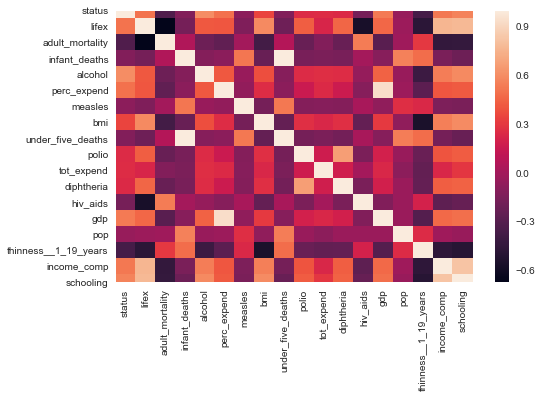

In [55]:
plt.figure(figsize = (8,5))
sns.heatmap(corr)

In [56]:
# sns.pairplot(df2) 

## CORRELATIONS AND VISUALS FOR CONCLUSION

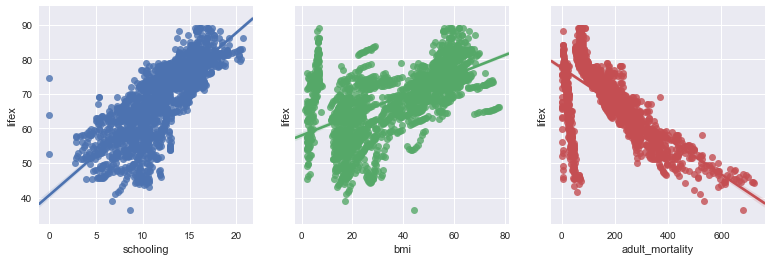

In [57]:
fig, axes = plt.subplots(1,3, figsize=(13,4), sharey = True)
sns.regplot(x='schooling', y='lifex', data=df2, ax=axes[0])
sns.regplot(x='bmi', y='lifex', data=df2, ax=axes[1])
sns.regplot(x='adult_mortality', y='lifex', data=df2, ax=axes[2])

In [58]:
corr = df2.corr()

In [59]:
corr

,status,lifex,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,income_comp,schooling
status,1.000000,0.507923,-0.324878,-0.119804,0.604666,0.498519,-0.081837,0.351459,-0.122500,0.252266,0.256758,0.247582,-0.164749,0.535281,-0.046552,-0.361304,0.527794,0.563150
lifex,0.507923,1.000000,-0.674593,-0.173029,0.414262,0.409859,-0.138045,0.588304,-0.198734,0.437254,0.223362,0.457653,-0.568724,0.464602,-0.022897,-0.484388,0.765561,0.781350
adult_mortality,-0.324878,-0.674593,1.000000,0.052829,-0.208354,-0.252934,0.000127,-0.375719,0.067417,-0.229302,-0.119770,-0.227061,0.536572,-0.283346,-0.012899,0.300770,-0.451394,-0.444721
infant_deaths,-0.119804,-0.173029,0.052829,1.000000,-0.113588,-0.089320,0.519139,-0.228670,0.996613,-0.158233,-0.147105,-0.161257,0.008670,-0.103422,0.556835,0.486770,-0.154878,-0.210071
alcohol,0.604666,0.414262,-0.208354,-0.113588,1.000000,0.415648,-0.036830,0.380188,-0.109557,0.248644,0.263109,0.254487,-0.051818,0.445057,-0.034968,-0.412750,0.542885,0.592556
perc_expend,0.498519,0.409859,-0.252934,-0.089320,0.415648,1.000000,-0.060543,0.258716,-0.091745,0.162318,0.241932,0.162856,-0.110176,0.937479,-0.026205,-0.272149,0.409931,0.422822
measles,-0.081837,-0.138045,0.000127,0.519139,-0.036830,-0.060543,1.000000,-0.171510,0.526444,-0.113652,-0.108126,-0.117241,0.022623,-0.070837,0.265894,0.236717,-0.142676,-0.152535
bmi,0.351459,0.588304,-0.375719,-0.228670,0.380188,0.258716,-0.171510,1.000000,-0.238801,0.271956,0.229849,0.272201,-0.242197,0.306962,-0.071956,-0.556152,0.553484,0.598014
under_five_deaths,-0.122500,-0.198734,0.067417,0.996613,-0.109557,-0.091745,0.526444,-0.238801,1.000000,-0.175984,-0.147833,-0.181951,0.020571,-0.106888,0.544494,0.488446,-0.174482,-0.226671
polio,0.252266,0.437254,-0.229302,-0.158233,0.248644,0.162318,-0.113652,0.271956,-0.175984,1.000000,0.170590,0.671120,-0.145686,0.197687,-0.039206,-0.222747,0.399251,0.430800


In [60]:
# plt.figure(figsize=(15,9))
# for i in df2.columns:
#     sns.regplot(df2[i], df2.lifex, data=df2)
#     plt.show()

In [61]:
df2.describe()

,status,lifex,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,income_comp,schooling
count,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2.244000e+03,2244.000000,2244.000000,2244.000000
mean,0.185383,68.836141,168.397504,34.058824,4.668581,845.263277,2571.937166,37.433690,47.259358,81.329768,5.990368,81.415775,2.065775,6679.950057,1.283534e+07,4.881283,0.624677,12.004545
std,0.388695,9.806200,128.813225,132.890430,3.933708,2182.402759,11650.313712,19.870907,180.634100,23.883354,2.290649,23.933154,5.693349,13585.317954,6.155374e+07,4.668294,0.205817,3.265339
min,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.000000,0.000000
25%,0.000000,62.500000,71.000000,0.000000,1.117500,21.253013,0.000000,18.700000,1.000000,75.750000,4.477500,77.000000,0.100000,437.516416,1.939068e+05,1.500000,0.487000,10.000000
50%,0.000000,71.500000,145.000000,3.000000,3.755000,97.600031,17.000000,42.000000,4.000000,92.000000,5.755000,92.000000,0.100000,1569.021293,1.383743e+06,2.950000,0.668000,12.200000
75%,0.000000,75.500000,232.000000,22.000000,7.342500,505.149696,426.500000,55.800000,29.000000,97.000000,7.482500,96.000000,1.100000,5224.262100,7.399592e+06,7.300000,0.770000,14.400000
max,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,212183.000000,77.600000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,0.948000,20.700000


# Model Selection

## OLS Linear Method

In [62]:
# model = ols(formula = 'le~GDP+bmi', data=df2).fit()

In [63]:
# model.summary()

In [64]:
# df2['le'].describe()

## sklearn method

In [65]:
df2.columns

Index(['status', 'lifex', 'adult_mortality', 'infant_deaths', 'alcohol',
       'perc_expend', 'measles', 'bmi', 'under_five_deaths', 'polio',
       'tot_expend', 'diphtheria', 'hiv_aids', 'gdp', 'pop',
       'thinness__1_19_years', 'income_comp', 'schooling'],
      dtype='object')

# Model Tuning

## Recursive Feature Elimination

In [66]:
df2.head(2)

,status,lifex,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,income_comp,schooling
0,0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,0,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0


In [67]:
features = df2.drop(columns=['lifex'])

In [68]:
target = df2.lifex

In [69]:
features.head()

,status,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,income_comp,schooling
0,0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,0,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,0,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,0,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,0,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5


### Model with 5 predictors

In [70]:
features = df2.drop(columns=['lifex'])

In [71]:
target = df2.lifex

In [72]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(features, target)

In [73]:
selector.ranking_

array([ 1,  9,  4,  1, 10, 12,  6,  5,  7,  3,  8,  1, 11, 13,  2,  1,  1])

In [74]:
i = selector.ranking_
zipped_rankings = list(zip(i, features))
best_predictors5 = []
for i in zipped_rankings:
    if i[0] == 1:
        best_predictors5.append(i[1])

In [75]:
best_predictors5

['status', 'alcohol', 'hiv_aids', 'income_comp', 'schooling']

In [76]:
formula = '+'.join(best_predictors5)

In [77]:
formula

'status+alcohol+hiv_aids+income_comp+schooling'

In [78]:
model = ols(formula = f'lifex~{formula}', data=df2).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1798.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:41:01   Log-Likelihood:                -6497.3
No. Observations:                2244   AIC:                         1.301e+04
Df Residuals:                    2238   BIC:                         1.304e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      45.7001      0.417    109.585      0.000      44.882      46.518
status          2.2340      0.318      7.025      0.000       1.610       2.858
alcohol        -0.2150      0.032     -6.630      0.000      -0.279      -0.151
hiv_aids       -0.6455      0.017    -37.820      0.000      -0.679      -0.612
income_comp    13.8938      0.812     17.113      0.000      12.302      15.486
schooling       1.3645      0.053     25.603      0.000       1.260       1.469
==============================================================================
Omnibus:                      116.688   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.260
Skew:                          -0.009   Prob(JB):                     1.85e-95
Kurtosis:                       5.160   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Train test on model with 5

In [80]:
features_5 = df2[best_predictors5]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(features_5, target, random_state=0, test_size=0.2)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

In [84]:
run_model(model, X_train, X_test, y_train, y_test)

Training R^2 : 0.8047522163135598
Training Root Mean Square Error 4.362902386338893
Training Root Mean Square Error Standardized 0.4449126628298919

----------------

Testing R^2 : 0.7806824900117386
Testing Root Mean Square Error 4.449413029737736
Training Root Mean Square Error Standardized 0.45373469855506077


In [85]:
y_pred_test = model.predict(X_test)

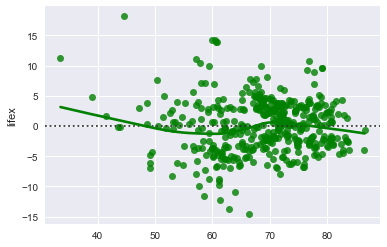

In [86]:
sns.residplot(y_pred_test, y_test, lowess=True, color="g")

In [87]:
residual = y_test - y_pred_test

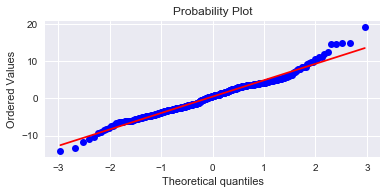

In [88]:
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

### Model with 10 features

In [89]:
features = df2.drop(columns=['lifex'])

In [90]:
target = df2.lifex

In [91]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=10)
selector = selector.fit(features, target)

In [92]:
i = selector.ranking_
zipped_rankings = list(zip(i, features))
best_predictors10 = []
for i in zipped_rankings:
    if i[0] == 1:
        best_predictors10.append(i[1])

In [93]:
selector.ranking_

array([1, 4, 1, 1, 5, 7, 1, 1, 2, 1, 3, 1, 6, 8, 1, 1, 1])

In [94]:
best_predictors10

['status',
 'infant_deaths',
 'alcohol',
 'bmi',
 'under_five_deaths',
 'tot_expend',
 'hiv_aids',
 'thinness__1_19_years',
 'income_comp',
 'schooling']

In [95]:
formula = '+'.join(best_predictors10)

In [96]:
model = ols(formula = f'lifex~{formula}', data=df2).fit()

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1009.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:41:01   Log-Likelihood:                -6390.5
No. Observations:                2244   AIC:                         1.280e+04
Df Residuals:                    2233   BIC:                         1.287e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               47.6680      0.536     88.994      0.000      46.618      48.718
status                   2.3037      0.305      7.552      0.000       1.706       2.902
infant_deaths            0.0948      0.009     11.011      0.000       0.078       0.112
alcohol                 -0.1763      0.032     -5.508      0.000      -0.239      -0.114
bmi                      0.0448      0.006      7.428      0.000       0.033       0.057
under_five_deaths       -0.0704      0.006    -11.103      0.000      -0.083      -0.058
tot_expend               0.0844      0.041      2.045      0.041       0.003       0.165
hiv_aids                -0.6159      0.017    -37.032      0.000      -0.649      -0.583
thinness__1_19_years    -0.0765      0.027     -2.830      0.005      -0.129      -0.023
income_comp             11.7324      0.792     14.805      0.000      10.178      13.286
schooling                1.1491      0.054     21.397      0.000       1.044       1.254
==============================================================================
Omnibus:                      108.839   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.633
Skew:                          -0.139   Prob(JB):                     3.25e-76
Kurtosis:                       4.908   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Train test on model with 10

In [98]:
features_10 = df2[best_predictors10]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(features_10, target, random_state=0, test_size=0.2)

In [100]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

In [102]:
run_model(model, X_train, X_test, y_train, y_test)

Training R^2 : 0.8206435845758409
Training Root Mean Square Error 4.1815846976433
Training Root Mean Square Error Standardized 0.42642255497226184

----------------

Testing R^2 : 0.8082047734568096
Testing Root Mean Square Error 4.1608778460923785
Training Root Mean Square Error Standardized 0.4243109467705311


In [103]:
rfe = RFECV(LinearRegression(),cv=5)
X_rfe_train = rfe.fit_transform(X_train, y_train)
X_rfe_test = rfe.transform(X_test)
lm = LinearRegression().fit(X_rfe_train, y_train)
run_model(lm, X_rfe_train, X_rfe_test, y_train, y_test)
print ('The optimal number of features is: ', rfe.n_features_)

Training R^2 : 0.8206435845758409
Training Root Mean Square Error 4.1815846976433
Training Root Mean Square Error Standardized 0.42642255497226184

----------------

Testing R^2 : 0.8082047734568096
Testing Root Mean Square Error 4.1608778460923785
Training Root Mean Square Error Standardized 0.4243109467705311
The optimal number of features is:  10


In [104]:
y_pred_test = model.predict(X_test)

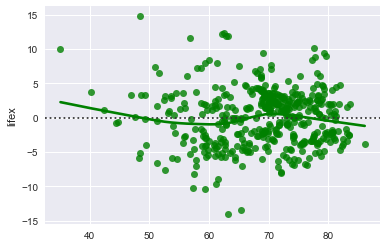

In [105]:
sns.residplot(y_pred_test, y_test, lowess=True, color="g")

In [106]:
residual = y_test - y_pred_test

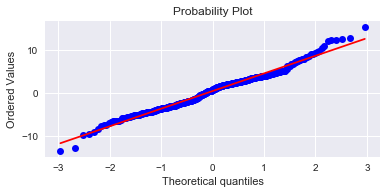

In [107]:
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

### Model with all

In [108]:
features = df2.drop(columns=['lifex'])

In [109]:
target = df2.lifex

In [110]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=30)
selector = selector.fit(features, target)

In [111]:
i = selector.ranking_
zipped_rankings = list(zip(i, features))
best_predictorsall = []
for i in zipped_rankings:
    if i[0] == 1:
        best_predictorsall.append(i[1])

In [112]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [113]:
formula = '+'.join(best_predictorsall)

In [114]:
formula

'status+adult_mortality+infant_deaths+alcohol+perc_expend+measles+bmi+under_five_deaths+polio+tot_expend+diphtheria+hiv_aids+gdp+pop+thinness__1_19_years+income_comp+schooling'

In [115]:
model = ols(formula = f'lifex~{formula}', data=df2).fit()

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     749.2
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:41:02   Log-Likelihood:                -6168.9
No. Observations:                2244   AIC:                         1.237e+04
Df Residuals:                    2226   BIC:                         1.248e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               50.8965      0.581     87.656      0.000      49.758      52.035
status                   1.2292      0.290      4.235      0.000       0.660       1.798
adult_mortality         -0.0154      0.001    -18.737      0.000      -0.017      -0.014
infant_deaths            0.0787      0.008      9.744      0.000       0.063       0.095
alcohol                 -0.1488      0.029     -5.077      0.000      -0.206      -0.091
perc_expend              0.0002      0.000      1.841      0.066   -1.29e-05       0.000
measles              -3.524e-06   8.21e-06     -0.429      0.668   -1.96e-05    1.26e-05
bmi                      0.0381      0.006      6.918      0.000       0.027       0.049
under_five_deaths       -0.0582      0.006     -9.816      0.000      -0.070      -0.047
polio                    0.0175      0.005      3.771      0.000       0.008       0.027
tot_expend               0.0190      0.038      0.502      0.616      -0.055       0.093
diphtheria               0.0209      0.005      4.419      0.000       0.012       0.030
hiv_aids                -0.4624      0.017    -27.216      0.000      -0.496      -0.429
gdp                   1.651e-05    1.8e-05      0.918      0.359   -1.88e-05    5.18e-05
pop                  -1.378e-09   1.59e-09     -0.866      0.387    -4.5e-09    1.74e-09
thinness__1_19_years    -0.0620      0.025     -2.519      0.012      -0.110      -0.014
income_comp              9.3995      0.732     12.847      0.000       7.965      10.834
schooling                0.9620      0.050     19.223      0.000       0.864       1.060
==============================================================================
Omnibus:                      101.911   Durbin-Watson:                   0.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.197
Skew:                          -0.200   Prob(JB):                     1.06e-60
Kurtosis:                       4.672   Cond. No.                     5.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Train test on model all BEST MODEL (TUNING AT BOTTOM OF NOTEBOOK)

In [117]:
features_all = df2[best_predictorsall]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(features_all, target, random_state=0, test_size=0.2)

In [119]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

**The following is a linear regression model with all features:**

In [121]:
run_model(model, X_train, X_test, y_train, y_test)

Training R^2 : 0.8529500238749982
Training Root Mean Square Error 3.786299108144346
Training Root Mean Square Error Standardized 0.3861127912807937

----------------

Testing R^2 : 0.8409864253421294
Testing Root Mean Square Error 3.7886385100101414
Training Root Mean Square Error Standardized 0.38635135483811717


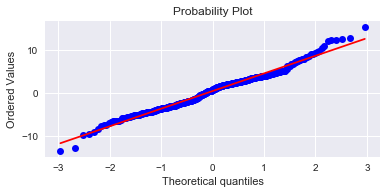

In [122]:
residual = y_test - y_pred_test

fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

**The following was obtained from a grid search performed farther below.**

**Ridge with alpha = .01:**
Training Root Mean Square Error Standardized 0.389204208197086

Training Root Mean Square Error Standardized 0.3794540128691246

**Ridge with alpha = .01 AND scaled:**

Training Root Mean Square Error Standardized: 0.38994469001592563

Training Root Mean Square Error Standardized: 0.37929177080146

**Lasso with alpha = .01:**

Training Root Mean Square Error Standardized 0.389204208197086

Training Root Mean Square Error Standardized 0.3794540128691246


**Lasso with alpha = .01 AND scaled**

Training Root Mean Square Error Standardized 0.3985981757115653

Training Root Mean Square Error Standardized 0.3857925012699103

**And finally, using RFECV to pick out the features with cross validation. It outperforms any gridsearch results on ridge/lasso regularization.**

In [123]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.2)

In [124]:
def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

In [125]:
rfe = RFECV(LinearRegression(),cv=50, verbose=False)
X_rfe_train = rfe.fit_transform(X_train, y_train)
X_rfe_test = rfe.transform(X_test)
lm = LinearRegression().fit(X_rfe_train, y_train)
run_model(lm, X_rfe_train, X_rfe_test, y_train, y_test)
print ('The optimal number of features is: ', rfe.n_features_)

Training R^2 : 0.852879670086985
Training Root Mean Square Error 3.7872047479752426
Training Root Mean Square Error Standardized 0.3862051450840763

----------------

Testing R^2 : 0.8409711038195287
Testing Root Mean Square Error 3.788821030000885
Training Root Mean Square Error Standardized 0.3863699675522947
The optimal number of features is:  14


In [126]:
i = rfe.ranking_
zipped_rankings = list(zip(i, features))
best_predictors_rfecv = []
dump = []
for i in zipped_rankings:
    if i[0] == 1:
        best_predictors_rfecv.append(i[1])
    else:
        dump.append(i[1])

selector.ranking_

print('keep: ', best_predictors_rfecv, len(best_predictors_rfecv), '\n')
print('dump: ', dump, len(dump),'\n')


keep:  ['status', 'adult_mortality', 'infant_deaths', 'alcohol', 'perc_expend', 'bmi', 'under_five_deaths', 'polio', 'tot_expend', 'diphtheria', 'hiv_aids', 'thinness__1_19_years', 'income_comp', 'schooling'] 14 

dump:  ['measles', 'gdp', 'pop'] 3 



In [127]:
y_pred_test = model.predict(X_test)

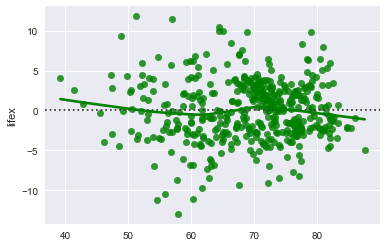

In [128]:
sns.residplot(y_pred_test, y_test, lowess=True, color="g")

## Gridsearch

In [129]:
alpha_range = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]

In [130]:
param_grid = dict(alpha=alpha_range)

In [131]:
ridge = Ridge()

In [132]:

# instantiate the grid
gridr = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False)

# fit the grid with data
# gridr.fit(X_train, y_train)


In [133]:
# print(gridr.best_score_)
# print(gridr.best_params_)
# print(gridr.best_estimator_)

In [134]:
lasso = Lasso()

In [135]:
gridlass = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False)

In [136]:
# gridlass.fit(X_train, y_train)

In [137]:
# print(gridlass.best_score_)
# print(gridlass.best_params_)
# print(gridlass.best_estimator_)

## Model with only bmi

In [138]:
model = ols(formula = f'lifex~bmi', data=df2).fit()

In [139]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1187.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          4.40e-209
Time:                        14:41:04   Log-Likelihood:                -7830.1
No. Observations:                2244   AIC:                         1.566e+04
Df Residuals:                    2242   BIC:                         1.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.9682      0.357    162.301      0.000      57.268      58.669
bmi            0.2903      0.008     34.448      0.000       0.274       0.307
==============================================================================
Omnibus:                       26.021   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.769
Skew:                           0.004   Prob(JB):                     3.13e-10
Kurtosis:                       3.684   Cond. No.                         90.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Train test on model with only bmi

In [140]:
features_bmi = pd.DataFrame(df2['bmi'])

X_train, X_test, y_train, y_test = train_test_split(features_bmi, target, random_state=0, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

run_model(model, X_train, X_test, y_train, y_test)

Training R^2 : 0.34843751039323456
Training Root Mean Square Error 7.970039559338175
Training Root Mean Square Error Standardized 0.8127551820338361

----------------

Testing R^2 : 0.33253066793126107
Testing Root Mean Square Error 7.762144567866166
Training Root Mean Square Error Standardized 0.7915548190519759


# Final Tuning and Evaluation

In [141]:
def reset_df2():    
    df2 = df.copy()
    df2.GDP = df.GDP.fillna(df.GDP.median())
    df2.Schooling = df.Schooling.fillna(df.Schooling.median())
    df2['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].median())
    df2['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].median())
    df2.Alcohol = df.Alcohol.fillna(df.Alcohol.median())
    df2['Status'] = np.where(df2['Status'] == 'Developing', 0,1)
    df2 = df2.drop(columns=['Hepatitis B', 'Country', 'Year',' thinness  1-19 years'])
    df2 = df2.dropna(subset =['Life expectancy '])
    df2 = df2.dropna()
    df2.head()
    df2.isna().sum()
    renamed = []
    for i in df2.columns:
        renamed.append(i.lower().strip().replace(' ', '_').replace('-','_').replace('/','_'))
    rename_dict = dict(zip(df2.columns, renamed))
    df2.rename(columns=rename_dict, inplace=True)
    shorten = {'life_expectancy':'lifex', \
               'percentage_expenditure':'perc_expend', \
               'total_expenditure':'tot_expend', \
              'population':'pop','income_composition_of_resources':'income_comp'}
    df2.rename(columns=shorten, inplace=True)
    return df2

df2 = reset_df2()

In [142]:
def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

## BEST Normal, Logged Target with LinearRegression, Lasso, and Ridge

In [143]:
df2 = reset_df2()
X_train, X_test, y_train, y_test = train_test_split(features_all, target, random_state=0, test_size=0.2)
features = df2.drop(columns=['lifex'])
target = df2.lifex

In [144]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1795, 17), (449, 17), (1795,), (449,))

In [145]:
def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

In [146]:
def df2_reg_rfe():  
    df2 = reset_df2()
    features = df2.drop(columns=['lifex'])
    target = df2.lifex
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.2)
    
    #create models
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    ridge = Ridge(alpha=0.01)
    ridge.fit(X_train, y_train)

    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)
    
    print('NOT LOGGED')
    print('Linear Regression:')
    run_model(model, X_train, X_test, y_train, y_test)
    sns.residplot(y_pred_test, y_test, lowess=True, color="g")
    residual = y_test - y_pred_test
    fig, ax = plt.subplots(figsize=(6,2.5))
    sns.distplot(residual)
    plt.show()
    print('-------------------------------')
    print('Ridge, alpha=.01')
    run_model(ridge, X_train, X_test, y_train, y_test)
    sns.residplot(y_pred_test, y_test, lowess=True, color="g")
    residual = y_test - y_pred_test
    fig, ax = plt.subplots(figsize=(6,2.5))
    sp.stats.probplot(residual, plot=ax, fit=True)
    plt.show()
    print('-------------------------------')
    print('Lasso, alpha=.01')
    run_model(lasso, X_train, X_test, y_train, y_test)
    sns.residplot(y_pred_test, y_test, lowess=True, color="g")
    residual = y_test - y_pred_test
    fig, ax = plt.subplots(figsize=(6,2.5))
    sp.stats.probplot(residual, plot=ax, fit=True)
    plt.show()

### IMMEDIATELY BELOW IS BEST MODEL

NOT LOGGED
Linear Regression:
Training R^2 : 0.8530222757113817
Training Root Mean Square Error 3.785368809878141
Training Root Mean Square Error Standardized 0.38601792290140036

----------------

Testing R^2 : 0.8402198704744105
Testing Root Mean Square Error 3.797759453455685
Training Root Mean Square Error Standardized 0.3872814749454531


/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.41465e-18): result may not be accurate.
  overwrite_a=True).T
/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13086.830979578344, tolerance: 17.499648798885797
  positive)


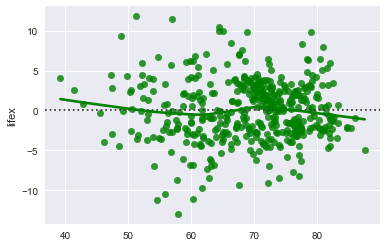

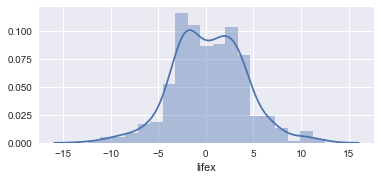

-------------------------------
Ridge, alpha=.01
Training R^2 : 0.8530222730065352
Training Root Mean Square Error 3.7853688447094105
Training Root Mean Square Error Standardized 0.38601792645336447

----------------

Testing R^2 : 0.8402240393905377
Testing Root Mean Square Error 3.7977099083590717
Training Root Mean Square Error Standardized 0.3872764225195878


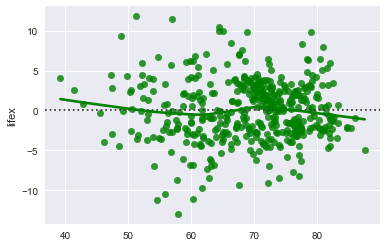

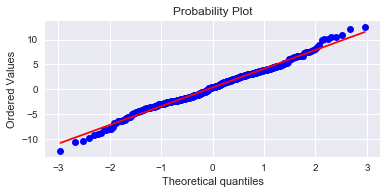

-------------------------------
Lasso, alpha=.01
Training R^2 : 0.8529315282205583
Training Root Mean Square Error 3.7865372172547085
Training Root Mean Square Error Standardized 0.3861370727679677

----------------

Testing R^2 : 0.8410616419080713
Testing Root Mean Square Error 3.787742353547328
Training Root Mean Square Error Standardized 0.3862599681136672


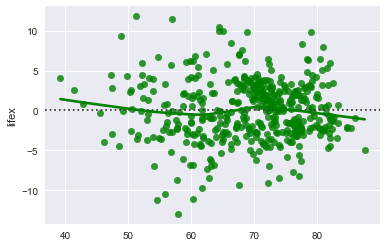

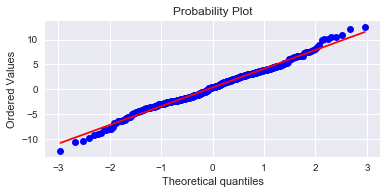

In [147]:
df2_reg_rfe()

In [148]:
def df2_log_feats():  
    df2 = reset_df2()
    features = df2.drop(columns=['lifex'])
    target = df2.lifex
    
    #train test df2
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.2)
    
    #log adult_mortality, gdp, pop, and thinness
    feats_to_log = ['adult_mortality', 'gdp', 'pop', 'thinness_5_9_years']
    for i in feats_to_log:
        X_train[f'log_{i}'] = X_train[i].apply(lambda x: np.log(x))
        X_train.drop(columns=[i], inplace=True)
        X_test[f'log_{i}'] = X_test[i].apply(lambda x: np.log(x))
        X_test.drop(columns=[i], inplace=True)
    
    
    #run the rfe
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    ridge = Ridge(alpha=0.01)
    ridge.fit(X_train, y_train)

    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)
    
    print('LOGGED')
    print('Linear Regression:')
    run_model(model, X_train, X_test, y_train, y_test)
    sns.residplot(y_pred_test, y_test, lowess=True, color="g")
    residual = y_test - y_pred_test
    fig, ax = plt.subplots(figsize=(6,2.5))
    sp.stats.probplot(residual, plot=ax, fit=True)
    plt.show()
    print('-------------------------------')
    print('Ridge, alpha=.01')
    run_model(ridge, X_train, X_test, y_train, y_test)
    sns.residplot(y_pred_test, y_test, lowess=True, color="g")
    residual = y_test - y_pred_test
    fig, ax = plt.subplots(figsize=(6,2.5))
    sp.stats.probplot(residual, plot=ax, fit=True)
    plt.show()
    print('-------------------------------')
    print('Lasso, alpha=.01')
    run_model(lasso, X_train, X_test, y_train, y_test)
    sns.residplot(y_pred_test, y_test, lowess=True, color="g")
    residual = y_test - y_pred_test
    fig, ax = plt.subplots(figsize=(6,2.5))
    sp.stats.probplot(residual, plot=ax, fit=True)
    plt.show()

/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

LOGGED
Linear Regression:
Training R^2 : 0.8411514594975785
Training Root Mean Square Error 3.935265647440054
Training Root Mean Square Error Standardized 0.4013038484720189

----------------

Testing R^2 : 0.8309769194859156
Testing Root Mean Square Error 3.906061486257701
Training Root Mean Square Error Standardized 0.39832571603475914


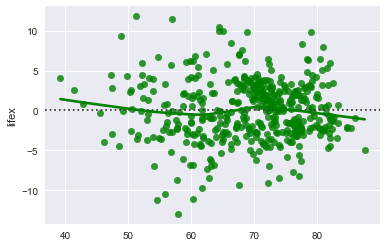

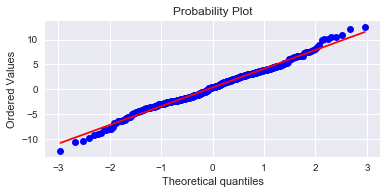

-------------------------------
Ridge, alpha=.01
Training R^2 : 0.8411514563514026
Training Root Mean Square Error 3.9352656864112583
Training Root Mean Square Error Standardized 0.4013038524461583

----------------

Testing R^2 : 0.8309811270793099
Testing Root Mean Square Error 3.906012867983968
Training Root Mean Square Error Standardized 0.3983207581228662


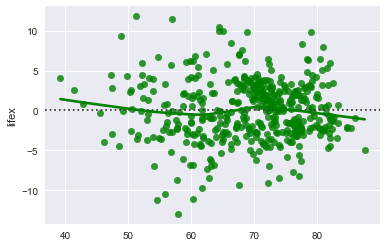

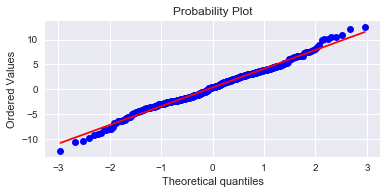

-------------------------------
Lasso, alpha=.01
Training R^2 : 0.8410629443224378
Training Root Mean Square Error 3.9363619188169823
Training Root Mean Square Error Standardized 0.40141564217591214

----------------

Testing R^2 : 0.8318002511703073
Testing Root Mean Square Error 3.8965364258286685
Training Root Mean Square Error Standardized 0.3973543855708079


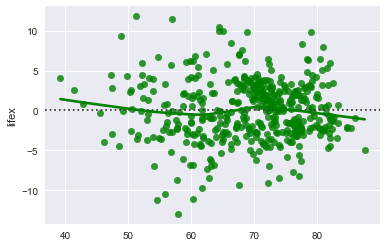

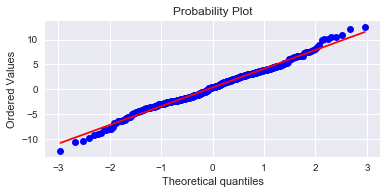

In [149]:
df2_log_feats()

# Useful and R2/RMSE from Scratch 

In [150]:
df2 = reset_df2()
#log adult_mortality, gdp, pop, and thinness
features = df2.drop(columns=['lifex'])
target = df2.lifex

In [151]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.2)

#run the rfe
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
lifex_std = target.std()

In [153]:
y_pred = model.predict(X_train)

In [154]:
y_pred

array([64.77090344, 80.20709998, 65.73504026, ..., 62.01165151,
       61.34232592, 66.68388325])

In [155]:
squared_res = []
mean = y_train.mean()
for i in y_pred:
    squared_res.append((i - mean)**2)
base_ssq = sum(squared_res)

In [156]:
base_ssq

149275.90242584376

In [157]:
y_pred

array([64.77090344, 80.20709998, 65.73504026, ..., 62.01165151,
       61.34232592, 66.68388325])

In [158]:
actual = y_train.values

In [159]:
actual

array([72. , 78.5, 70. , ..., 71.8, 56.8, 66.8])

In [160]:
squared_res = []
for i in range(len(actual)):
    squared_res.append((y_pred[i] - actual[i])**2)
ssq = sum(squared_res)

In [161]:
ssq

25720.585563102864

In [162]:
1- ssq/base_ssq

0.8276976715925053

In [163]:
print('Training R^2 :', model.score(X_train, y_train))

Training R^2 : 0.8530222757113817


In [164]:
y_pred_train = model.predict(X_train)
y_pred_train

array([64.77090344, 80.20709998, 65.73504026, ..., 62.01165151,
       61.34232592, 66.68388325])

In [165]:
(ssq/len(actual))**.5

3.785368809878141

In [166]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print('Training Root Mean Square Error', train_rmse)

Training Root Mean Square Error 3.785368809878141


In [167]:
y_pred_test = model.predict(X_test)

In [168]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [169]:
test_rmse

3.797759453455685

In [170]:
train_rmse/lifex_std

0.38601792290140036

In [171]:
test_rmse/lifex_std

0.3872814749454531